# Analysis of Correlation between Stocks and SP500
Demonstrate retrieving several daily stock charts and calculating the pearson correlation between their daily close and the SP500.  The hypothesis is that a portion of their movement is related to the overall market movements.

In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL','MSFT','NVDA','AMD','INTL','SQ','PYPL','V','MC','^GSPC']

# Gather data from 2018 only
start_date = '2018-01-01'
end_date = '2018-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
#Google finance is deprecated
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [86]:
#inspect
#panel_data.head(9)
#panel_data['Close']
#panel_data['Close']['AAPL']

close = panel_data['Close']
close.describe()


Symbols,AAPL,AMD,INTL,MC,MSFT,NVDA,PYPL,SQ,V,^GSPC
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,190.830806,17.122669,47.415424,53.564068,100.892670,238.270890,82.531102,62.514958,132.668093,2759.916864
std,19.872471,6.358623,5.119329,6.541104,8.077228,28.823344,4.910114,15.433279,9.649184,84.148875
min,155.149994,9.530000,38.959999,38.680000,85.010002,144.699997,71.730003,36.169998,113.860001,2581.000000
25%,175.000000,11.907500,43.570000,50.842499,93.777498,226.075005,78.855001,48.545000,123.400003,2701.517578
50%,187.169998,15.660000,46.200001,53.775000,100.869999,244.185005,83.014999,62.525000,133.644997,2748.515015
75%,208.927505,20.465000,51.964999,58.562499,108.055000,254.969997,85.962500,72.559999,140.227505,2819.215027
max,232.070007,32.720001,56.500000,66.949997,115.610001,289.359985,93.070000,99.010002,150.789993,2930.750000


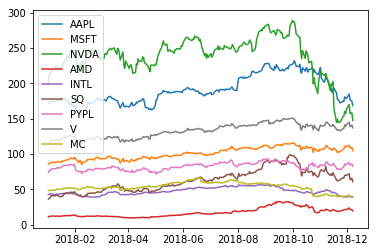

In [87]:
#Lets first evaluate the data graphically

import matplotlib
import matplotlib.pyplot as plt

plt.plot(panel_data['Close']['AAPL'])
plt.plot(panel_data['Close']['MSFT'])
plt.plot(panel_data['Close']['NVDA'])
plt.plot(panel_data['Close']['AMD'])
plt.plot(panel_data['Close']['INTL'])
plt.plot(panel_data['Close']['SQ'])
plt.plot(panel_data['Close']['PYPL'])
plt.plot(panel_data['Close']['V'])
plt.plot(panel_data['Close']['MC'])
#plt.plot(panel_data['Close']['^GSPC'])
plt.legend()
plt.show()

In [82]:
#Lets calculate the correlate the close prices 
import numpy as np
correlation = np.corrcoef(panel_data['Close']['AAPL'], panel_data['Close']['^GSPC'])
correlation[1,0]

0.722016194218477

In [88]:
#Another way to calculate the correlation between all close columns is
panel_data['Close'].corr()

Symbols,AAPL,AMD,INTL,MC,MSFT,NVDA,PYPL,SQ,V,^GSPC
Symbols,,,,,,,,,,
AAPL,1.000000,0.866910,0.618458,0.159821,0.859483,0.442406,0.686239,0.905649,0.863367,0.722016
AMD,0.866910,1.000000,0.443196,-0.001122,0.894095,0.248376,0.694517,0.924604,0.887278,0.719244
INTL,0.618458,0.443196,1.000000,0.690897,0.581438,0.620627,0.702371,0.616925,0.652602,0.634460
MC,0.159821,-0.001122,0.690897,1.000000,0.075772,0.807097,0.270943,0.128337,0.159208,0.388206
MSFT,0.859483,0.894095,0.581438,0.075772,1.000000,0.201153,0.768646,0.948611,0.978682,0.672758
NVDA,0.442406,0.248376,0.620627,0.807097,0.201153,1.000000,0.370396,0.336179,0.270283,0.606569
PYPL,0.686239,0.694517,0.702371,0.270943,0.768646,0.370396,1.000000,0.761393,0.813714,0.806714
SQ,0.905649,0.924604,0.616925,0.128337,0.948611,0.336179,0.761393,1.000000,0.949111,0.691125
V,0.863367,0.887278,0.652602,0.159208,0.978682,0.270283,0.813714,0.949111,1.000000,0.713888


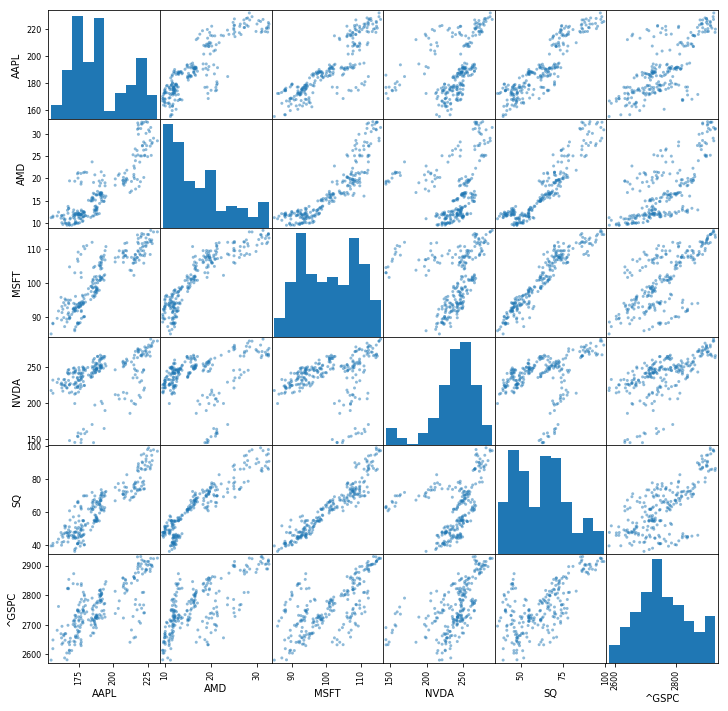

In [84]:
#Lets show a scatter matrix
pd.plotting.scatter_matrix(close, figsize=(12, 12))
plt.show()


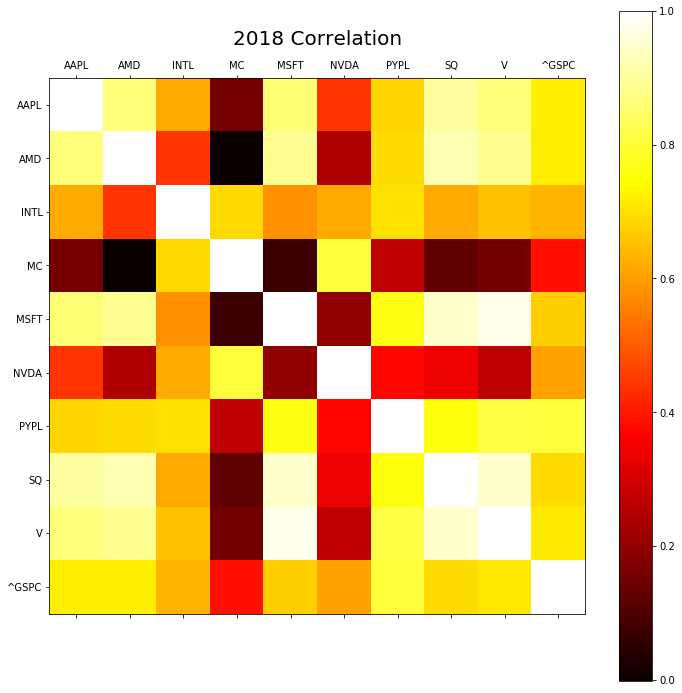

In [94]:
#Visually describe the correlation
plt.figure(figsize=(12,12))

#plt.matshow(close.corr())
#plt.matshow(close.corr(), cmap='copper')
#plt.matshow(close.corr(), cmap='PiYG',vmin=-1, vmax=1)
plt.matshow(close.corr(), cmap='hot', fignum=1)
plt.xticks(range(len(close.columns)), close.columns)
plt.yticks(range(len(close.columns)), close.columns)
plt.colorbar()
plt.title("2018 Correlation", fontsize=20)
plt.show()


In [102]:
#Lets show which other stocks are highly correlated to sq
panel_data['Close'].corr()['SQ'].sort_values(ascending=False)[1:]

Symbols
V        0.949111
MSFT     0.948611
AMD      0.924604
AAPL     0.905649
PYPL     0.761393
^GSPC    0.691125
INTL     0.616925
NVDA     0.336179
MC       0.128337
Name: SQ, dtype: float64

In [103]:
#And for NVDA
panel_data['Close'].corr()['NVDA'].sort_values(ascending=False)[1:]

Symbols
MC       0.807097
INTL     0.620627
^GSPC    0.606569
AAPL     0.442406
PYPL     0.370396
SQ       0.336179
V        0.270283
AMD      0.248376
MSFT     0.201153
Name: NVDA, dtype: float64